Прогнозирование с помощью регрессии.

Класс моделей ARIMA недостаточно богат для наших данных: с их помощью, например, никак нельзя учесть взаимосвязи между рядами. Это можно сделать с помощью векторной авторегрессии VARIMA, но её питоновская реализация не позволяет использовать регрессионные признаки. Кроме того, авторегрессионный подход не позволяет учитывать, например, взаимодействия между сезонными компонентами. Вы могли заметить, что форма суточных сезонных профилей в будни и выходные немного разная; явно моделировать этот эффект с помощью ARIMA не получится.

Нам нужна более сложная модель. Давайте займёмся сведением задачи массового прогнозирования рядов к регрессионной постановке!

Вам понадобится много признаков. Некоторые из них у вас уже есть — это:

- идентификатор географической зоны
- дата и время
- количество поездок в периоды, предшествующие прогнозируемому
- синусы, косинусы и тренды, которые вы использовали внутри регрессионной компоненты ARIMA

Кроме того, не спешите выбрасывать построенный вами на прошлой неделе прогнозы — из них может получиться хороший признак для регрессии!

Вы можете попробовать разные регрессионный модели, но хорошие результаты, скорее всего, дадут такие, которые будут позволять признакам взаимодействовать друг с другом.

Поскольку прогноз нужен на 6 часов вперёд, проще всего будет построить 6 независимых регрессионных моделей — одна для прогнозирования

$$(\hat{y}_{T+1|T})$$

другая для

$$( \hat{y}_{T+2|T} )$$

и т.д.

Чтобы сдать задание, выполните следующую последовательность действий.

1. Для каждой из шести задач прогнозирования $$( \hat{y}_{T+i|T}, i=1,\dots,6 )$$сформируйте выборки. Откликом будет $$( y_{T+i} )$$ при всевозможных значениях $$( T )$$, а признаки можно использовать следующие:

идентификатор географической зоны — категориальный

год, месяц, день месяца, день недели, час — эти признаки можно пробовать брать и категориальными, и непрерывными, можно даже и так, и так

синусы, косинусы и тренды, которые вы использовали внутри регрессионной компоненты ARIMA

сами значения прогнозов ARIMA $$( \hat{y}_{T+i|T}^{ARIMA} )$$

количество поездок из рассматриваемого района в моменты времени $$( y_T, y_{T-1}, \dots, y_{T-K} )$$ (параметр $$( K )$$ можно подбирать; попробуйте начать, например, с 6)

количество поездок из рассматриваемого района в моменты времени $$( y_{T-24}, y_{T-48}, \dots, y_{T-24*K_d} )$$ (параметр $$( K_d )$$ можно подбирать; попробуйте начать, например, с 2)

суммарное количество поездок из рассматриваемого района за предшествующие полдня, сутки, неделю, месяц

Будьте внимательны при создании признаков — все факторы должны быть рассчитаны без использования информации из будущего: при прогнозировании $$( \hat{y}_{T+i|T}, i=1,\dots,6 )$$ вы можете учитывать только значения $$( y )$$ до момента времени $$( T ) $$ включительно.

2. Разбейте каждую из шести выборок на три части:

обучающая, на которой будут настраиваться параметры моделей — всё до апреля 2016

тестовая, на которой вы будете подбирать значения гиперпараметров — май 2016

итоговая, которая не будет использоваться при настройке моделей вообще — июнь 2016

3. Выберите вашу любимую регрессионную модель и настройте её на каждом из шести наборов данных, подбирая гиперпараметры на мае 2016. Желательно, чтобы модель:

допускала попарные взаимодействия между признаками

была устойчивой к избыточному количеству признаков (например, использовала регуляризаторы)

4. Выбранными моделями постройте для каждой географической зоны и каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 прогнозы на 6 часов вперёд; посчитайте в ноутбуке ошибку прогноза по следующему функционалу:

$$ Q_{may} =\frac1{R * 739* 6} \sum\limits_{r=1}^{R} \sum_{T=2016.04.30 23:00}^{2016.05.31 17:00} \sum_{i=1}^6 \left| \hat{y}^r_{T|T+i} - y^r_{T+i} \right|$$ Убедитесь, что ошибка полученных прогнозов, рассчитанная согласно функционалу $$( Q )$$, определённому на прошлой неделе, уменьшилась по сравнению с той, которую вы получили методом индивидуального применения моделей ARIMA. Если этого не произошло, попробуйте улучшить ваши модели.
5. Итоговыми моделями постройте прогнозы для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 и запишите все результаты в один файл в формате geoID, histEndDay, histEndHour, step, y. Здесь geoID — идентификатор зоны, histEndDay — день конца истории в формате id,y, где столбец id состоит из склеенных через подчёркивание идентификатора географической зоны, даты конца истории, часа конца истории и номера отсчёта, на который делается предсказание (1-6); столбец y — ваш прогноз.

6. Загрузите полученный файл на kaggle: https://inclass.kaggle.com/c/yellowtaxi. Добавьте в ноутбук ссылку на сабмишн.

7. Загрузите ноутбук в форму.

В качестве ответа в этом задании вам нужно загрузить ноутбук; убедитесь, что ход анализа, который вы провели, описан достаточно подробно для того, чтобы ваши сокурсники поняли, что вы делали и почему. ﻿
Что в этой работе можно было сделать по-другому — оптимальнее, короче или понятнее? Как в рамках поставленного задания можно было добиться лучшего качества прогнозов? ﻿

In [32]:
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.decomposition
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection, metrics, datasets, tree, linear_model
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Считываем данные о поездках в первом полугодии 2016 года.

In [34]:
data_raw=pd.read_csv('table_6_month.csv', header=0)#Считываем данные.

In [35]:
regions=pd.read_csv('regions_more_5.csv', header=0)#считываем данные о регионах где было более 5 поездок в час.
regions['region']=regions['region'].apply(func=str)#Преобразуем номера регионов в формат str
columns=['Day_hour']+list(regions['region'])#Создаем список колонок, которые возьмем из исходного файла данных.
data_raw=data_raw[columns]#Отбираем только нужные колонки

In [36]:
data_raw.head(2)

,Day_hour,1075,1076,1077,1125,1126,1127,1128,1129,1130,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,2016-01-01 00:00:00,80.0,144.0,50.0,77.0,319.0,402.0,531.0,617.0,846.0,...,12.0,0.0,2.0,44.0,5.0,41.0,4.0,70.0,7.0,66.0
1,2016-01-01 01:00:00,91.0,211.0,49.0,134.0,404.0,420.0,370.0,453.0,594.0,...,29.0,0.0,5.0,2.0,2.0,4.0,0.0,47.0,1.0,29.0


In [37]:
data_raw.tail(2)

,Day_hour,1075,1076,1077,1125,1126,1127,1128,1129,1130,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
4366,2016-06-30 22:00:00,106.0,168.0,103.0,125.0,317.0,476.0,405.0,508.0,578.0,...,3.0,19.0,5.0,358.0,387.0,169.0,12.0,206.0,146.0,0.0
4367,2016-06-30 23:00:00,85.0,130.0,86.0,113.0,256.0,428.0,483.0,531.0,631.0,...,9.0,0.0,7.0,323.0,110.0,147.0,38.0,173.0,119.0,0.0


#### 1й Пункт заданой последовательности действий. Создание признаков. Создание выборок для каждой модели.

Создам признаки и добавлю их в таблицу. Признаки будут такие: sin1 - sin7, cos1 - cos7, sin24, cos24, sin168, cos168,  yT, yT_1, yT_2, yT_3, yT_4, yT_5, yT_6, yT_24, yT_48, yT_168, S12, S24, S168, S_month

In [38]:
#Создаем гармоники синусов и косинусов
data_raw['sin1']=np.sin((data_raw.index+1)*2*3.14*1/168)
data_raw['cos1']=np.cos((data_raw.index+1)*2*3.14*1/168)
data_raw['sin2']=np.sin((data_raw.index+1)*2*3.14*2/168)
data_raw['cos2']=np.cos((data_raw.index+1)*2*3.14*2/168)
data_raw['sin3']=np.sin((data_raw.index+1)*2*3.14*3/168)
data_raw['cos3']=np.cos((data_raw.index+1)*2*3.14*3/168)
data_raw['sin4']=np.sin((data_raw.index+1)*2*3.14*4/168)
data_raw['cos4']=np.cos((data_raw.index+1)*2*3.14*4/168)
data_raw['sin5']=np.sin((data_raw.index+1)*2*3.14*5/168)
data_raw['cos5']=np.cos((data_raw.index+1)*2*3.14*5/168)
data_raw['sin6']=np.sin((data_raw.index+1)*2*3.14*6/168)
data_raw['cos6']=np.cos((data_raw.index+1)*2*3.14*6/168)
data_raw['sin7']=np.sin((data_raw.index+1)*2*3.14*7/168)
data_raw['cos7']=np.cos((data_raw.index+1)*2*3.14*7/168)
data_raw['sin24']=np.sin((data_raw.index+1)*2*3.14*24/168)
data_raw['cos24']=np.cos((data_raw.index+1)*2*3.14*24/168)
data_raw['sin168']=np.sin((data_raw.index+1)*2*3.14*168/168)
data_raw['cos168']=np.cos((data_raw.index+1)*2*3.14*168/168)

In [39]:
data_raw.head(3)

,Day_hour,1075,1076,1077,1125,1126,1127,1128,1129,1130,...,sin5,cos5,sin6,cos6,sin7,cos7,sin24,cos24,sin168,cos168
0,2016-01-01 00:00:00,80.0,144.0,50.0,77.0,319.0,402.0,531.0,617.0,846.0,...,0.185818,0.982584,0.222410,0.974953,0.258691,0.965960,0.781548,0.623846,-0.003185,0.999995
1,2016-01-01 01:00:00,91.0,211.0,49.0,134.0,404.0,420.0,370.0,453.0,594.0,...,0.365165,0.930943,0.433679,0.901068,0.499770,0.866158,0.975130,-0.221634,-0.006371,0.999980
2,2016-01-01 02:00:00,90.0,146.0,23.0,110.0,393.0,425.0,313.0,366.0,377.0,...,0.531791,0.846875,0.623223,0.782044,0.706825,0.707388,0.435113,-0.900376,-0.009556,0.999954


Создадим первую часть общей таблицы признаков. Буду брать данные начиная с февраля, так как потом будет признак "сумма поездок за предыдущий месяц", а для дней_часов января я такой признак не смогу посчитать. Думаю для обучения регрессора и этого хватит.

In [40]:
#Создаем таблицу синусов косинусов для каждогозначения поездок, с которой будем далее работать
data_sc=pd.DataFrame(columns=['Day_hour','y','sin1', 'cos1', 'sin2','cos2', 'sin3', 
                              'cos3', 'sin4', 'cos4', 'sin5','cos5', 'sin6', 'cos6',
                              'sin7', 'cos7', 'sin24','cos24', 'sin168', 'cos168'])

In [41]:
data_sc.head()

,Day_hour,y,sin1,cos1,sin2,cos2,sin3,cos3,sin4,cos4,sin5,cos5,sin6,cos6,sin7,cos7,sin24,cos24,sin168,cos168


In [42]:
%%time
#В цикле заполняем таблицу данными для каждого региона
for zone in regions['region']:
    d=data_raw[['Day_hour', zone, 'sin1', 'cos1', 'sin2','cos2', 'sin3', 'cos3', 'sin4', 'cos4', 'sin5','cos5', 
                'sin6', 'cos6', 'sin7', 'cos7', 'sin24','cos24', 'sin168', 'cos168']]
    d.columns=['Day_hour','y','sin1', 'cos1', 'sin2','cos2', 'sin3', 'cos3', 'sin4', 'cos4', 'sin5','cos5', 
               'sin6', 'cos6','sin7', 'cos7', 'sin24','cos24', 'sin168', 'cos168']
    data_sc=data_sc.append(d, ignore_index=True)

Wall time: 1.53 s


In [43]:
data_sc.tail(2)

,Day_hour,y,sin1,cos1,sin2,cos2,sin3,cos3,sin4,cos4,sin5,cos5,sin6,cos6,sin7,cos7,sin24,cos24,sin168,cos168
445534,2016-06-30 22:00:00,0.0,-0.119910,0.992785,-0.238089,0.971243,-0.352833,0.935686,-0.462485,0.886627,-0.565463,0.824774,-0.660282,0.751018,-0.745572,0.666425,-0.254004,-0.967203,-0.974362,0.224988
445535,2016-06-30 23:00:00,0.0,-0.082723,0.996573,-0.164880,0.986314,-0.245906,0.969294,-0.325246,0.945629,-0.402357,0.915483,-0.476710,0.879061,-0.547795,0.836613,-0.914375,-0.404869,-0.975073,0.221883


In [44]:
data_sc.head(2)

,Day_hour,y,sin1,cos1,sin2,cos2,sin3,cos3,sin4,cos4,sin5,cos5,sin6,cos6,sin7,cos7,sin24,cos24,sin168,cos168
0,2016-01-01 00:00:00,80.0,0.037372,0.999301,0.074692,0.997207,0.111908,0.993719,0.148967,0.988842,0.185818,0.982584,0.222410,0.974953,0.258691,0.965960,0.781548,0.623846,-0.003185,0.999995
1,2016-01-01 01:00:00,91.0,0.074692,0.997207,0.148967,0.988842,0.222410,0.974953,0.294610,0.955618,0.365165,0.930943,0.433679,0.901068,0.499770,0.866158,0.975130,-0.221634,-0.006371,0.999980


In [45]:
data_sc.loc[694:697]

,Day_hour,y,sin1,cos1,sin2,cos2,sin3,cos3,sin4,cos4,sin5,cos5,sin6,cos6,sin7,cos7,sin24,cos24,sin168,cos168
694,2016-01-29 22:00:00,65.0,0.749311,0.662219,0.992415,-0.122933,0.565080,-0.825036,-0.244002,-0.969775,-0.888245,-0.459370,-0.932423,0.361368,-0.346691,0.937980,0.995784,0.091727,-0.800305,-0.599593
695,2016-01-29 23:00:00,63.0,0.773536,0.633752,0.980461,-0.196716,0.469203,-0.883090,-0.385744,-0.922606,-0.958135,-0.286317,-0.828697,0.559698,-0.092243,0.995737,0.692904,-0.721029,-0.798391,-0.602139
696,2016-01-30 00:00:00,52.0,0.796680,0.604401,0.963029,-0.269399,0.367431,-0.930051,-0.518878,-0.854848,-0.994651,-0.103292,-0.683458,0.729989,0.168485,0.985704,-0.131254,-0.991349,-0.796469,-0.604679
697,2016-01-30 01:00:00,41.0,0.818712,0.574205,0.940217,-0.340577,0.261043,-0.965327,-0.640433,-0.768014,-0.996522,0.083332,-0.503983,0.863714,0.417743,0.908565,-0.856668,-0.515868,-0.794539,-0.607213


Теперь нужно сформировать признаки, связанные с количествами поездок в прошлом. А потом добавить это все в таблицу данных. В итоге получу таблицу с февраля по июнь, так как буду использовать признак сумма поездок из региона за месяц до этого часа.

In [46]:
%%time
#Содаем таблицу куда будем складывать признаки
data_y=pd.DataFrame(columns=['d_h', 'zone', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5',
                              'y_6', 'yT', 'yT_1', 'yT_2', 'yT_3', 'yT_4', 'yT_5', 
                             'yT_6', 'yT_24', 'yT_48', 'yT_168', 'S12', 'S24', 'S168', 'S_month'])

Wall time: 2.99 ms


In [47]:
data_y

,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,yT_1,...,yT_4,yT_5,yT_6,yT_24,yT_48,yT_168,S12,S24,S168,S_month


In [48]:
%%time
d_y=pd.DataFrame(columns=['d_h', 'zone', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5',
                              'y_6', 'yT', 'yT_1', 'yT_2', 'yT_3', 'yT_4', 'yT_5',
                              'yT_6', 'yT_24', 'yT_48', 'yT_168', 'S12', 'S24', 'S168', 'S_month'])
 #Добавляем столбец дата_час
d_y['d_h']=data_raw['Day_hour']

Wall time: 15 ms


In [49]:
%%time
#Добавляем столбец номер зоны  
d_y['zone']='1075'

Wall time: 998 µs


In [50]:
%%time
#Добавляем столбцы других признаков 
d_y['yT']=data_raw['1075']
d_y['yT_1']=data_raw['1075'].shift(1)
d_y['yT_2']=data_raw['1075'].shift(2)
d_y['yT_3']=data_raw['1075'].shift(3)
d_y['yT_4']=data_raw['1075'].shift(4)
d_y['yT_5']=data_raw['1075'].shift(5)
d_y['yT_6']=data_raw['1075'].shift(6)
d_y['yT_24']=data_raw['1075'].shift(24)
d_y['yT_48']=data_raw['1075'].shift(48)
d_y['yT_168']=data_raw['1075'].shift(168)

Wall time: 6.95 ms


In [51]:
%%time
#И так же добавляем столбцы сдвинутого целевого признака, потом пригодится при формировании выборок для каждой модели
d_y['y_1']=data_raw['1075'].shift(-1)
d_y['y_2']=data_raw['1075'].shift(-2)
d_y['y_3']=data_raw['1075'].shift(-3)
d_y['y_4']=data_raw['1075'].shift(-4)
d_y['y_5']=data_raw['1075'].shift(-5)
d_y['y_6']=data_raw['1075'].shift(-6)

Wall time: 2.99 ms


In [52]:
%%time
for i in range (data_raw.shape[0]):
    d_y['S12'].loc[i]=np.sum(data_raw['1075'].loc[i-12:i-1])
    d_y['S24'].loc[i]=np.sum(data_raw['1075'].loc[i-24:i-1])
    d_y['S168'].loc[i]=np.sum(data_raw['1075'].loc[i-168:i-1])
    d_y['S_month'].loc[i]=np.sum(data_raw['1075'].loc[i-720:i-1])

Wall time: 7min 28s


In [53]:
%%time
d_y['s_12']=data_raw['1075'].rolling(13).sum()-data_raw['1075']
d_y['s_24']=data_raw['1075'].rolling(25).sum()-data_raw['1075']
d_y['s_168']=data_raw['1075'].rolling(169).sum()-data_raw['1075']
d_y['s_month']=data_raw['1075'].rolling(721).sum()-data_raw['1075']

Wall time: 4.96 ms


In [54]:
d_y.tail(15)

,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,yT_1,...,yT_48,yT_168,S12,S24,S168,S_month,s_12,s_24,s_168,s_month
4353,2016-06-30 09:00:00,1075,56.0,71.0,124.0,137.0,109.0,86.0,58.0,57.0,...,62.0,67.0,586,1790,13141,51692,586.0,1790.0,13141.0,51692.0
4354,2016-06-30 10:00:00,1075,71.0,124.0,137.0,109.0,86.0,81.0,56.0,58.0,...,69.0,72.0,501,1762,13132,51697,501.0,1762.0,13132.0,51697.0
4355,2016-06-30 11:00:00,1075,124.0,137.0,109.0,86.0,81.0,82.0,71.0,56.0,...,76.0,96.0,433,1749,13116,51706,433.0,1749.0,13116.0,51706.0
4356,2016-06-30 12:00:00,1075,137.0,109.0,86.0,81.0,82.0,88.0,124.0,71.0,...,96.0,87.0,411,1728,13091,51699,411.0,1728.0,13091.0,51699.0
4357,2016-06-30 13:00:00,1075,109.0,86.0,81.0,82.0,88.0,116.0,137.0,124.0,...,93.0,106.0,493,1739,13128,51724,493.0,1739.0,13128.0,51724.0
4358,2016-06-30 14:00:00,1075,86.0,81.0,82.0,88.0,116.0,104.0,109.0,137.0,...,99.0,128.0,604,1746,13159,51763,604.0,1746.0,13159.0,51763.0
4359,2016-06-30 15:00:00,1075,81.0,82.0,88.0,116.0,104.0,151.0,86.0,109.0,...,86.0,120.0,702,1745,13140,51748,702.0,1745.0,13140.0,51748.0
4360,2016-06-30 16:00:00,1075,82.0,88.0,116.0,104.0,151.0,106.0,81.0,86.0,...,71.0,81.0,784,1743,13106,51729,784.0,1743.0,13106.0,51729.0
4361,2016-06-30 17:00:00,1075,88.0,116.0,104.0,151.0,106.0,85.0,82.0,81.0,...,92.0,110.0,854,1743,13106,51730,854.0,1743.0,13106.0,51730.0
4362,2016-06-30 18:00:00,1075,116.0,104.0,151.0,106.0,85.0,NaN,88.0,82.0,...,75.0,121.0,926,1726,13078,51728,926.0,1726.0,13078.0,51728.0


In [55]:
%%time
#Будем в цикле перебирать все регионы, вычислять значения и добавлять в таблицу
for zone in regions['region']:
    d_y=pd.DataFrame(columns=['d_h', 'zone', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5',
                              'y_6', 'yT', 'yT_1', 'yT_2', 'yT_3', 'yT_4', 'yT_5',
                              'yT_6', 'yT_24', 'yT_48', 'yT_168', 'S12', 'S24', 'S168', 'S_month'])
    #Добавляем столбец дата_час
    d_y['d_h']=data_raw['Day_hour']
    #Добавляем столбец номер зоны  
    d_y['zone']=zone
   #Добавляем столбцы других признаков 
    d_y['yT']=data_raw[zone]
    d_y['yT_1']=data_raw[zone].shift(1)
    d_y['yT_2']=data_raw[zone].shift(2)
    d_y['yT_3']=data_raw[zone].shift(3)
    d_y['yT_4']=data_raw[zone].shift(4)
    d_y['yT_5']=data_raw[zone].shift(5)
    d_y['yT_6']=data_raw[zone].shift(6)
    d_y['yT_24']=data_raw[zone].shift(24)
    d_y['yT_48']=data_raw[zone].shift(48)
    d_y['yT_168']=data_raw[zone].shift(168)
    #И так же добавляем столбцы сдвинутого целевого признака, потом пригодится при формировании выборок для каждой модели
    d_y['y_1']=data_raw[zone].shift(-1)
    d_y['y_2']=data_raw[zone].shift(-2)
    d_y['y_3']=data_raw[zone].shift(-3)
    d_y['y_4']=data_raw[zone].shift(-4)
    d_y['y_5']=data_raw[zone].shift(-5)
    d_y['y_6']=data_raw[zone].shift(-6)
    #Создаю признаки равные сумме поездок за определенный период
    for i in range (data_raw.shape[0]):
        d_y['S12']=data_raw[zone].rolling(13).sum()-data_raw[zone]
        d_y['S24']=data_raw[zone].rolling(25).sum()-data_raw[zone]
        d_y['S168']=data_raw[zone].rolling(169).sum()-data_raw[zone]
        d_y['S_month']=data_raw[zone].rolling(721).sum()-data_raw[zone]
            
   #Добавляем данные региона в общую таблицу
    data_y=data_y.append(d_y, ignore_index=True)

Wall time: 14min 38s


In [56]:
data_y.tail(10)

,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,yT_1,...,yT_4,yT_5,yT_6,yT_24,yT_48,yT_168,S12,S24,S168,S_month
445526,2016-06-30 14:00:00,2168,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,3.0,0.0,0.0,18.0,31.0,225.0,22846.0
445527,2016-06-30 15:00:00,2168,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,18.0,28.0,225.0,22772.0
445528,2016-06-30 16:00:00,2168,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,...,2.0,0.0,1.0,0.0,2.0,0.0,18.0,26.0,225.0,22696.0
445529,2016-06-30 17:00:00,2168,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,1.0,2.0,0.0,2.0,0.0,0.0,20.0,28.0,227.0,22576.0
445530,2016-06-30 18:00:00,2168,1.0,0.0,1.0,0.0,0.0,NaN,1.0,1.0,...,0.0,1.0,2.0,1.0,0.0,1.0,17.0,27.0,228.0,22484.0
445531,2016-06-30 19:00:00,2168,0.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,2.0,13.0,27.0,228.0,22404.0
445532,2016-06-30 20:00:00,2168,1.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,...,2.0,0.0,0.0,1.0,0.0,0.0,10.0,28.0,227.0,22302.0
445533,2016-06-30 21:00:00,2168,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,9.0,27.0,227.0,22191.0
445534,2016-06-30 22:00:00,2168,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,1.0,1.0,2.0,1.0,0.0,1.0,10.0,28.0,228.0,22062.0
445535,2016-06-30 23:00:00,2168,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,9.0,27.0,227.0,21939.0


In [57]:
%%time
#Стандартизирую вещественные признаки
data_y[['yT', 'yT_1', 'yT_2', 'yT_3', 
         'yT_4', 'yT_5', 'yT_6', 'yT_24', 
         'yT_48', 'yT_168', 'S12', 'S24', 
         'S168', 'S_month']]=StandardScaler().fit_transform(data_y[['yT', 'yT_1', 'yT_2', 'yT_3', 
                                                                 'yT_4', 'yT_5', 'yT_6', 'yT_24', 
                                                                 'yT_48', 'yT_168', 'S12', 'S24', 'S168', 'S_month']])

Wall time: 1.27 s


In [58]:
#Объединим таблицы признаков
data=pd.concat([data_sc['y'], data_y,data_sc.drop(columns=['Day_hour', 'y'])], axis=1)


In [59]:
#Переведем значения столбца день_час в формат datetime
data['d_h']=pd.to_datetime(data['d_h'])

Добавим еще такие признаки: день недели, день месяца, час.

In [60]:
data['day_in_month']=data['d_h'].apply(lambda x: int(str(x)[8:10]))
data['hour']=data['d_h'].apply(lambda x: int(str(x)[11:13]))
data['day_of_week'] = data['d_h'].dt.dayofweek


In [61]:
data.tail(10)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,...,cos6,sin7,cos7,sin24,cos24,sin168,cos168,day_in_month,hour,day_of_week
445526,0.0,2016-06-30 14:00:00,2168,0.0,2.0,1.0,1.0,1.0,0.0,-0.600515,...,-0.810311,-0.205394,-0.978679,0.594899,-0.803801,-0.968313,0.249741,30,14,3
445527,0.0,2016-06-30 15:00:00,2168,2.0,1.0,1.0,1.0,0.0,1.0,-0.600515,...,-0.659683,-0.451578,-0.892232,-0.257084,-0.966389,-0.969103,0.246656,30,15,3
445528,2.0,2016-06-30 16:00:00,2168,1.0,1.0,1.0,0.0,1.0,0.0,-0.592555,...,-0.476010,-0.667019,-0.745041,-0.915660,-0.401954,-0.969884,0.243567,30,16,3
445529,1.0,2016-06-30 17:00:00,2168,1.0,1.0,0.0,1.0,0.0,0.0,-0.596535,...,-0.268491,-0.837049,-0.547128,-0.885377,0.464874,-0.970655,0.240477,30,17,3
445530,1.0,2016-06-30 18:00:00,2168,1.0,0.0,1.0,0.0,0.0,NaN,-0.596535,...,-0.047522,-0.950093,-0.311967,-0.189017,0.981974,-0.971416,0.237384,30,18,3
445531,1.0,2016-06-30 19:00:00,2168,0.0,1.0,0.0,0.0,NaN,NaN,-0.596535,...,0.175827,-0.998455,-0.055568,0.649542,0.760326,-0.972167,0.234288,30,19,3
445532,0.0,2016-06-30 20:00:00,2168,1.0,0.0,0.0,NaN,NaN,NaN,-0.600515,...,0.390368,-0.978843,0.204615,0.999445,-0.033323,-0.972909,0.231190,30,20,3
445533,1.0,2016-06-30 21:00:00,2168,0.0,0.0,NaN,NaN,NaN,NaN,-0.596535,...,0.585354,-0.892591,0.450868,0.597456,-0.801902,-0.973640,0.228090,30,21,3
445534,0.0,2016-06-30 22:00:00,2168,0.0,NaN,NaN,NaN,NaN,NaN,-0.600515,...,0.751018,-0.745572,0.666425,-0.254004,-0.967203,-0.974362,0.224988,30,22,3
445535,0.0,2016-06-30 23:00:00,2168,NaN,NaN,NaN,NaN,NaN,NaN,-0.600515,...,0.879061,-0.547795,0.836613,-0.914375,-0.404869,-0.975073,0.221883,30,23,3


In [62]:
#Переводим параметрs дней и часов в категориальный вид. Появится еще несколько десятков колонок признаков.
from sklearn.preprocessing import OneHotEncoder

In [63]:
vec=OneHotEncoder()#Создаем энкодер

In [64]:
#Переводим параметры день месяца, час, день недели в категориальный вид. Появится еще несколько десятков колонок признаков.
d_of_m=vec.fit_transform(np.array(data['day_in_month'].apply(str)).reshape(-1,1)).toarray()#Трансформируем
d_of_m_cat=pd.DataFrame(d_of_m, columns=map(lambda x: 'd_m_'+str(int(x)), vec.categories_[0]))#Создаем категорийные день месяца
hour_of_day=vec.fit_transform(np.array(data['hour'].apply(str)).reshape(-1,1)).toarray()#Трансформируем
hour_cat=pd.DataFrame(hour_of_day, columns=map(lambda x: 'hour'+str(int(x)), vec.categories_[0]))#Создаем категорийные час дня
d_of_w=vec.fit_transform(np.array(data['day_of_week'].apply(str)).reshape(-1,1)).toarray()#Трансформируем
d_of_w_cat=pd.DataFrame(d_of_w, columns=map(lambda x: 'd_w'+str(int(x)), vec.categories_[0]))#Создаем категорийные день недели

In [65]:
d_of_m_cat.head()

,d_m_1,d_m_2,d_m_3,d_m_4,d_m_5,d_m_6,d_m_7,d_m_8,d_m_9,d_m_10,...,d_m_22,d_m_23,d_m_24,d_m_25,d_m_26,d_m_27,d_m_28,d_m_29,d_m_30,d_m_31
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
hour_cat.head()

,hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
d_of_w_cat.loc[694:697]

,d_w0,d_w1,d_w2,d_w3,d_w4,d_w5,d_w6
694,0.0,0.0,0.0,0.0,1.0,0.0,0.0
695,0.0,0.0,0.0,0.0,1.0,0.0,0.0
696,0.0,0.0,0.0,0.0,0.0,1.0,0.0
697,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
#Добавим категорийные признаки в общий дата-фрейм и уберем вещественные признаки день месяца, день недели, час.
data=pd.concat([data, d_of_m_cat, d_of_w_cat, hour_cat], axis=1)
data=data.drop(columns=['day_in_month', 'hour', 'day_of_week'])

In [69]:
data.tail(10)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
445526,0.0,2016-06-30 14:00:00,2168,0.0,2.0,1.0,1.0,1.0,0.0,-0.600515,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445527,0.0,2016-06-30 15:00:00,2168,2.0,1.0,1.0,1.0,0.0,1.0,-0.600515,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445528,2.0,2016-06-30 16:00:00,2168,1.0,1.0,1.0,0.0,1.0,0.0,-0.592555,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445529,1.0,2016-06-30 17:00:00,2168,1.0,1.0,0.0,1.0,0.0,0.0,-0.596535,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
445530,1.0,2016-06-30 18:00:00,2168,1.0,0.0,1.0,0.0,0.0,NaN,-0.596535,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
445531,1.0,2016-06-30 19:00:00,2168,0.0,1.0,0.0,0.0,NaN,NaN,-0.596535,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
445532,0.0,2016-06-30 20:00:00,2168,1.0,0.0,0.0,NaN,NaN,NaN,-0.600515,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
445533,1.0,2016-06-30 21:00:00,2168,0.0,0.0,NaN,NaN,NaN,NaN,-0.596535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
445534,0.0,2016-06-30 22:00:00,2168,0.0,NaN,NaN,NaN,NaN,NaN,-0.600515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
445535,0.0,2016-06-30 23:00:00,2168,NaN,NaN,NaN,NaN,NaN,NaN,-0.600515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
#Переводим параметр зона в категориальный вид. Появится еще 102 колонки признаков.
zones=vec.fit_transform(np.array(data['zone'].apply(str)).reshape(-1,1)).toarray()#Трансформируем
zones_cat=pd.DataFrame(zones, columns=map(int, vec.categories_[0]))#Создаем дата-фрейм категорийных признаков зоны

In [71]:
#Добавим категорийные признаки зон в общий дата-фрейм
data=pd.concat([data, zones_cat], axis=1)

In [72]:
print(data.columns[:100])

Index(['y', 'd_h', 'zone', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'yT',
       'yT_1', 'yT_2', 'yT_3', 'yT_4', 'yT_5', 'yT_6', 'yT_24', 'yT_48',
       'yT_168', 'S12', 'S24', 'S168', 'S_month', 'sin1', 'cos1', 'sin2',
       'cos2', 'sin3', 'cos3', 'sin4', 'cos4', 'sin5', 'cos5', 'sin6', 'cos6',
       'sin7', 'cos7', 'sin24', 'cos24', 'sin168', 'cos168', 'd_m_1', 'd_m_2',
       'd_m_3', 'd_m_4', 'd_m_5', 'd_m_6', 'd_m_7', 'd_m_8', 'd_m_9', 'd_m_10',
       'd_m_11', 'd_m_12', 'd_m_13', 'd_m_14', 'd_m_15', 'd_m_16', 'd_m_17',
       'd_m_18', 'd_m_19', 'd_m_20', 'd_m_21', 'd_m_22', 'd_m_23', 'd_m_24',
       'd_m_25', 'd_m_26', 'd_m_27', 'd_m_28', 'd_m_29', 'd_m_30', 'd_m_31',
       'd_w0', 'd_w1', 'd_w2', 'd_w3', 'd_w4', 'd_w5', 'd_w6', 'hour0',
       'hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8',
       'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15',
       'hour16', 'hour17', 'hour18', 'hour19', 'hour20'],
      dtype='object')


In [73]:
print(data.columns[100:200])

Index(['hour21', 'hour22', 'hour23',     1075,     1076,     1077,     1125,
           1126,     1127,     1128,     1129,     1130,     1131,     1132,
           1172,     1173,     1174,     1175,     1176,     1177,     1178,
           1179,     1180,     1181,     1182,     1183,     1184,     1221,
           1222,     1223,     1224,     1225,     1227,     1228,     1229,
           1230,     1231,     1232,     1233,     1234,     1235,     1272,
           1273,     1274,     1278,     1279,     1280,     1281,     1282,
           1283,     1284,     1285,     1286,     1287,     1326,     1327,
           1331,     1332,     1333,     1334,     1335,     1336,     1337,
           1338,     1339,     1376,     1377,     1378,     1380,     1382,
           1383,     1384,     1385,     1386,     1387,     1388,     1389,
           1390,     1426,     1431,     1434,     1435,     1436,     1437,
           1438,     1439,     1441,     1442,     1480,     1482,     1483,

In [74]:
len(data.columns)

205

In [75]:
#Запишу в файл получившуюся таблицу.
data.to_csv('2019 09 19 data w5 1.csv', index=False)

In [76]:
data=pd.read_csv('2019 09 19 data w5 1.csv', header=0)

In [77]:
data.head(3)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,yT,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,80.0,2016-01-01 00:00:00,1075,91.0,90.0,32.0,24.0,11.0,7.0,-0.282124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,2016-01-01 01:00:00,1075,90.0,32.0,24.0,11.0,7.0,9.0,-0.238345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.0,2016-01-01 02:00:00,1075,32.0,24.0,11.0,7.0,9.0,18.0,-0.242325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


На основании общей таблицы создадим 6 выборок для каждого часа прогнозирования. Они отличаются друг от друга значением целевого признака y.

In [78]:
#Создам дата-фреймы для каждой модели.
data_1=data.drop(columns=['y_2', 'y_3', 'y_4', 'y_5', 'y_6']).copy(deep=True)
data_2=data.drop(columns=['y_1', 'y_3', 'y_4', 'y_5', 'y_6']).copy(deep=True)
data_3=data.drop(columns=['y_1', 'y_2', 'y_4', 'y_5', 'y_6']).copy(deep=True)
data_4=data.drop(columns=['y_1', 'y_3', 'y_2', 'y_5', 'y_6']).copy(deep=True)
data_5=data.drop(columns=['y_1', 'y_3', 'y_4', 'y_2', 'y_6']).copy(deep=True)
data_6=data.drop(columns=['y_1', 'y_3', 'y_4', 'y_5', 'y_2']).copy(deep=True)

In [79]:
data_1.head(2)

,y,d_h,zone,y_1,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,80.0,2016-01-01 00:00:00,1075,91.0,-0.282124,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,2016-01-01 01:00:00,1075,90.0,-0.238345,-0.282098,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
data_6.head(2)

,y,d_h,zone,y_6,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,80.0,2016-01-01 00:00:00,1075,7.0,-0.282124,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,2016-01-01 01:00:00,1075,9.0,-0.238345,-0.282098,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
data_1.tail(2)

,y,d_h,zone,y_1,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
445534,0.0,2016-06-30 22:00:00,2168,0.0,-0.600515,-0.596521,-0.600481,-0.596486,-0.596465,-0.596458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
445535,0.0,2016-06-30 23:00:00,2168,NaN,-0.600515,-0.600501,-0.596501,-0.600466,-0.596465,-0.596458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
data_6.tail(2)

,y,d_h,zone,y_6,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
445534,0.0,2016-06-30 22:00:00,2168,NaN,-0.600515,-0.596521,-0.600481,-0.596486,-0.596465,-0.596458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
445535,0.0,2016-06-30 23:00:00,2168,NaN,-0.600515,-0.600501,-0.596501,-0.600466,-0.596465,-0.596458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
data_1.shape

(445536, 200)

In [83]:
#Создаем список таблиц с данными
list_of_tables=[data_1, data_2, data_3, data_4, data_5, data_6]

In [84]:
#Во всех таблицах поменяем название столбца целевого признака на Y.
list_of_columns=list(data_1.columns)
list_of_columns[3]='Y'
for table in list_of_tables:
    table.columns=list_of_columns

In [85]:
data_1.head(2)

,y,d_h,zone,Y,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,80.0,2016-01-01 00:00:00,1075,91.0,-0.282124,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,2016-01-01 01:00:00,1075,90.0,-0.238345,-0.282098,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
data_6.head(2)

,y,d_h,zone,Y,yT,yT_1,yT_2,yT_3,yT_4,yT_5,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
0,80.0,2016-01-01 00:00:00,1075,7.0,-0.282124,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,2016-01-01 01:00:00,1075,9.0,-0.238345,-0.282098,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2й Пункт заданной последовательности действий. Разбиваем выборки для моделей на подвыборки.

#### 3й Пункт заданной последовательности действий. Выбор линейной модели.

Попробую сравнить Lasso Regressor и XGBoost Regressor. Использую поиск по сетке для определения лучших параметров регрессора.

Обучать регрессор будем на данных с февраля по апрель включительно. Для теста и подбора гиперпараметров будем применять данные за май. Для создания выборок нужно создать генератор разбиения.

In [87]:
#Создаем сет данных для обучения и тестирования моделей. Пока только для первого часа предсказаний.
data_exp=data_1[(data_1['d_h']>='2016-02-01 00:00:00')&(data_1['d_h']<='2016-05-31 23:00:00')].copy(deep=True)
data_exp.index=range(data_exp.shape[0])

In [88]:
#Создаем массивы индексов для обучения и для тестирования. Обучать будем на данных с 01 февраля по 30 апреля 23:00
#Тестировать и подбирать гиперпараметры будем на данных с 01 мая 00:00 по 31 мая 23:00.
train_ind=data_exp[data_exp['d_h']<='2016-04-30 23:00:00'].index #Массив индексов для тренировки
test_ind=data_exp[data_exp['d_h']>='2016-05-01 00:00:00'].index #Массив индексов для тестирования и определения гиперпараметров

In [89]:
test_ind[-5:]

Int64Index([296203, 296204, 296205, 296206, 296207], dtype='int64')

In [90]:
#Создаем генератор индексов выборок
def custom_cv (train, test):
    yield train, test

In [91]:
#Создаем Lasso регрессор.
lasso=linear_model.Lasso(random_state = 0)

In [92]:
#Посмотрим параметры
lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [93]:
#Задаем параметры поиска по сетке
parameters_grid_lasso= {
    'max_iter' : [1000, 100],
    'alpha' : [ 0.05, 0.1, 1],
}

In [94]:
#Задаем сетку
grid_lasso = model_selection.GridSearchCV(lasso, parameters_grid_lasso, scoring = 'neg_mean_absolute_error', 
                                          cv = custom_cv (np.array(train_ind), np.array(test_ind)))

In [95]:
%%time
#Обучаем сетку
grid_lasso.fit(data_exp[data_exp.columns[4:]], data_exp['Y'])

Wall time: 42.8 s


GridSearchCV(cv=<generator object custom_cv at 0x00000206ADA84840>,
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 1], 'max_iter': [1000, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [96]:
grid_lasso.best_estimator_ #Смотрим результаты выбора по сетке

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

In [97]:
print(grid_lasso.best_score_)#Лучшая ошибка
print(grid_lasso.best_params_)#Лучшие гипер-праметры, которые определяли

-26.697730293193242
{'alpha': 1, 'max_iter': 1000}


In [98]:
#Создаем XGB Regressor
xgb_model= xgb.XGBRegressor(max_depth=10, n_estimators=200, random_state=0)

In [99]:
#Задаем параметры поиска по сетке
parameters_grid_xgb = {
    'reg_alpha':[0.5, 1],
    'reg_lambda':[0.005, 0.01],
    }

In [100]:
grid_xgb=model_selection.GridSearchCV(estimator = xgb_model, param_grid = parameters_grid_xgb, 
                        scoring='neg_mean_absolute_error', cv=custom_cv (np.array(train_ind), np.array(test_ind)))

In [101]:
%%time
#Обучаем сетку
grid_xgb.fit(data_exp[data_exp.columns[4:]], data_exp['Y'])

[17:34:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 33min 28s


GridSearchCV(cv=<generator object custom_cv at 0x00000206ADA849A8>,
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=10,
                                    min_child_weight=1, missing=None,
                                    n_estimators=200, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'reg_alpha': [0.5, 1], 'reg_lambda

In [102]:
grid_xgb.best_estimator_ #Смотрим параметры лучшей модели

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [103]:
print(grid_xgb.best_score_)#Лучшая ошибка
print(grid_xgb.best_params_)#Лучшие гипер-параметры

-18.881617245516672
{'reg_alpha': 1, 'reg_lambda': 0.01}


In [104]:
#Сделаем предсказания для мая и июня для первого часа. Предсказания запишем в отдельные таблицы.
pred_1_may=grid_xgb.best_estimator_.predict(data_exp[(data_exp['d_h']>='2016-04-30 23:00:00')&
                             (data_exp['d_h']<='2016-05-31 17:00:00')][data_exp.columns[4:]])
pred_1_june=grid_xgb.best_estimator_.predict(data_1[(data_1['d_h']>='2016-05-31 23:00:00')&
                             (data_1['d_h']<='2016-06-30 17:00:00')][data_1.columns[4:]])
pred_may=pd.DataFrame(pred_1_may, columns=['1'])
pred_june=pd.DataFrame(pred_1_june, columns=['1'])

In [105]:
pred_may.head(2)

,1
0,72.087990
1,39.051151


In [106]:
pred_june.head(2)

,1
0,22.931368
1,14.229513


XGB Regressor дает приемлемую ошибку на тесте. Далее буду развивать его.
В цикле обучу модели для прогонозирования оставшихся часов. Так же буду сразу прогнозировать май и июнь.

#### 4. Выбранными моделями постройте для каждой географической зоны и каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 прогнозы на 6 часов вперёд; посчитайте в ноутбуке ошибку прогноза

#### 5. Итоговыми моделями постройте прогнозы для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 и запишите все результаты в один файл в формате geoID, histEndDay, histEndHour, step, y.

In [107]:
list_of_best_params=[{'reg_alpha': 0.5, 'reg_lambda': 0.005}]

In [108]:
list_of_best_score=[-18.88]

In [109]:
%%time
#Создадим сеты для обучения и предсказаний для остальных часов прогнозов. Обучим модель, сделаем предсказания.
i=2
for table in list_of_tables[1:]:
    #Обнуляем предыдущие сетку и модель, чтоб не занимали память.
    grid_xgb=None
    xgb_model=None
    xgb_model_j=None
    #Создаем таблицу данных для обучения и определения гипер-параметров.
    data_exp=table[(table['d_h']>='2016-02-01 00:00:00')&(table['d_h']<='2016-05-31 23:00:00')].copy(deep=True)
    data_exp.index=range(data_exp.shape[0])
    #Создаемрегрессор
    xgb_model= xgb.XGBRegressor(max_depth=10, n_estimators=200, random_state=0)
    #Создаем сетку
    grid_xgb=model_selection.GridSearchCV(estimator = xgb_model, param_grid = parameters_grid_xgb, 
                        scoring='neg_mean_absolute_error', cv=custom_cv (np.array(train_ind), np.array(test_ind)))
    #Обучаем сетку
    grid_xgb.fit(data_exp[data_exp.columns[4:]], data_exp['Y'])
    #Записываем параметры модели в список
    list_of_best_params.append(grid_xgb.best_params_)
    #Записываем ошибку модели в список
    list_of_best_score.append(grid_xgb.best_score_)
    #Обучаем регрессор на данных до июняб Делаем предсказания мая
    xgb_model_m= xgb.XGBRegressor(max_depth=10, n_estimators=200, random_state=0, reg_alpha=grid_xgb.best_params_['reg_alpha'],
                                 reg_lambda=grid_xgb.best_params_['reg_lambda'])
    xgb_model_m.fit(table[(table['d_h']>='2016-02-01 00:00:00')&(table['d_h']<='2016-04-30 23:00:00')][table.columns[4:]], 
                    table[(table['d_h']>='2016-02-01 00:00:00')&(table['d_h']<='2016-04-30 23:00:00')]['Y'])
    pred_m=xgb_model_m.predict(data_exp[(data_exp['d_h']>='2016-04-30 23:00:00')&
                             (data_exp['d_h']<='2016-05-31 17:00:00')][data_exp.columns[4:]])
    #Обучаем регрессор на данных с маем, делаем предсказание на июнь
    xgb_model_j= xgb.XGBRegressor(max_depth=10, n_estimators=200, random_state=0, reg_alpha=grid_xgb.best_params_['reg_alpha'],
                                 reg_lambda=grid_xgb.best_params_['reg_lambda'])
    xgb_model_j.fit(data_exp[data_exp.columns[4:]], data_exp['Y'])
    pred_j=xgb_model_j.predict(table[(table['d_h']>='2016-05-31 23:00:00')&
                             (table['d_h']<='2016-06-30 17:00:00')][table.columns[4:]])
    #Записываем предсказания в таблицу предсказаний
    pred_may[str(i)]=pred_m
    pred_june[str(i)]=pred_j
    i+=1
    

[18:07:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:26:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [110]:
pred_june.shape[0]*6 #Проверю длину таблицы предсказаний.

437580

In [111]:
pred_may.shape[0]*6

452268

In [112]:
pred_june.head()

,1,2,3,4,5,6
0,22.931368,17.541929,5.946283,4.457378,4.282107,9.539703
1,14.229513,8.862007,3.095909,6.066503,10.912876,35.671749
2,9.108100,5.100977,3.606751,12.432151,26.386444,50.117107
3,3.142630,4.738270,9.178869,26.671070,20.588266,86.285889
4,5.012207,12.917199,29.796858,45.364849,84.400154,70.818253


In [113]:
#Записываю предсказания в файлы
pred_may.to_csv('pred_may_w5_1.csv', index=False)
pred_june.to_csv('pred_june_w5_1.csv', index=False)

Объединю целевые признаки и предсказания в таблицы для мая и июня. Чтоб потом посчитать ошибку для мая и сформировать файл для загрузки в Кагл для июня.

In [114]:
#Отбираю целевые признаки
data_may=data[data.columns[:9]][(data['d_h']>='2016-04-30 23:00:00')&(data['d_h']<='2016-05-31 17:00:00')].copy()
data_may.index=range(data_may.shape[0])

In [115]:
#Добавляю предсказания
data_may=pd.concat([data_may, pred_may], axis=1)

In [116]:
data_may.head(3)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,1,2,3,4,5,6
0,92.0,2016-04-30 23:00:00,1075,71.0,37.0,10.0,14.0,6.0,8.0,72.087990,42.309093,32.060379,13.601595,7.780840,6.930158
1,71.0,2016-05-01 00:00:00,1075,37.0,10.0,14.0,6.0,8.0,10.0,39.051151,15.915436,12.879348,8.177567,9.265484,20.003216
2,37.0,2016-05-01 01:00:00,1075,10.0,14.0,6.0,8.0,10.0,21.0,22.245413,10.783883,8.646553,12.013072,13.533154,23.952728


In [117]:
data_june=data[data.columns[:9]][(data['d_h']>='2016-05-31 23:00:00')&(data['d_h']<='2016-06-30 17:00:00')].copy()
data_june.index=range(data_june.shape[0])
data_june=pd.concat([data_june, pred_june], axis=1)

In [118]:
data_june.head(3)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,1,2,3,4,5,6
0,34.0,2016-05-31 23:00:00,1075,26.0,14.0,5.0,2.0,1.0,7.0,22.931368,17.541929,5.946283,4.457378,4.282107,9.539703
1,26.0,2016-06-01 00:00:00,1075,14.0,5.0,2.0,1.0,7.0,23.0,14.229513,8.862007,3.095909,6.066503,10.912876,35.671749
2,14.0,2016-06-01 01:00:00,1075,5.0,2.0,1.0,7.0,23.0,34.0,9.108100,5.100977,3.606751,12.432151,26.386444,50.117107


In [119]:
#В таблице для мая сделаю колнку сумм разностей предсказания и целевого признака
data_may['s']=abs(data_may['1']-data_may['y_1'])+abs(data_may['2']-data_may['y_2'])+abs(data_may['3']-data_may['y_3'])+abs(data_may['4']-data_may['y_4'])+abs(data_may['5']-data_may['y_5'])+abs(data_may['6']-data_may['y_6'])

In [120]:
data_may.head(2)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,1,2,3,4,5,6,s
0,92.0,2016-04-30 23:00:00,1075,71.0,37.0,10.0,14.0,6.0,8.0,72.087990,42.309093,32.060379,13.601595,7.780840,6.930158,31.706549
1,71.0,2016-05-01 00:00:00,1075,37.0,10.0,14.0,6.0,8.0,10.0,39.051151,15.915436,12.879348,8.177567,9.265484,20.003216,22.533505


In [161]:
#Считаю сумму ошибок по регионам
s_may=0
for region in regions['region']:
    s_may=s_may+sum(data_may['s'][data_may['zone']==int(region)])

In [162]:
s_may

10956006.824945092

In [163]:
#Считаю общую ошибку для мая.
Q_may=s_may/102/739/6

In [164]:
print (Q_may) #Даже очень не плохо.

24.224589900114736


In [125]:
#Формирую таблицу для загрузки на Кагл. В цикле перебираю строчки таблицы предсказаний для июня и заполняю массивы id и y.
ids=[]
ys=[]
for i in range(data_june.shape[0]):
    for j in range(1,7):
        ids.append(str(data_june['zone'][i])+'_'+str(data_june['d_h'][i])[:10]+'_'+str(int(str(data_june['d_h'][i])[11:13]))+'_'+str(j))
        ys.append(data_june[str(j)][i])

In [126]:
len(ids)

437580

In [127]:
len(ys)

437580

In [128]:
#Создаю таблицу как просят в задании
dyn_pred_june=pd.DataFrame(ids, columns=['id'])
dyn_pred_june['y']=ys

In [129]:
dyn_pred_june.head(10)

,id,y
0,1075_2016-05-31_23_1,22.931368
1,1075_2016-05-31_23_2,17.541929
2,1075_2016-05-31_23_3,5.946283
3,1075_2016-05-31_23_4,4.457378
4,1075_2016-05-31_23_5,4.282107
5,1075_2016-05-31_23_6,9.539703
6,1075_2016-06-01_0_1,14.229513
7,1075_2016-06-01_0_2,8.862007
8,1075_2016-06-01_0_3,3.095909
9,1075_2016-06-01_0_4,6.066503


In [130]:
dyn_pred_june.tail(10)

,id,y
437570,2168_2016-06-30_16_3,9.947850
437571,2168_2016-06-30_16_4,20.846556
437572,2168_2016-06-30_16_5,19.316153
437573,2168_2016-06-30_16_6,23.114286
437574,2168_2016-06-30_17_1,8.714722
437575,2168_2016-06-30_17_2,5.824077
437576,2168_2016-06-30_17_3,11.936563
437577,2168_2016-06-30_17_4,26.562717
437578,2168_2016-06-30_17_5,27.677244
437579,2168_2016-06-30_17_6,36.152054


In [131]:
dyn_pred_june.to_csv('dyn_pred_june_w5_1.csv', index=False)#Записываем в файл предсказания для июня.

#### 6. Загрузите полученный файл на kaggle: https://inclass.kaggle.com/c/yellowtaxi. Добавьте в ноутбук ссылку на сабмишн.

Ссылка на сабмишн: https://inclass.kaggle.com/c/yellowtaxi/submissions?sortBy=date&group=selected&page=1&pageSize=20&turbolinks%5BrestorationIdentifier%5D=86c08b12-1a02-464b-89c1-966aaca5136d

Место в Leaderboard 124 (Sergey Martynov). Score 28,42.

Посмторю как выглядят данные поездок и предсказания визуально. Возьму данные за июнь.

In [132]:
#Построю график поездок для июня для региона 1223
#Считываю файл динамических предсказаний для июня, сделанный на неделе 4.
dyn_pred_4=pd.read_csv('dyn_pred_june.csv', header=0)

In [133]:
# Добавляем столбец зоны
dyn_pred_4['zone']=dyn_pred_4['id'].apply(lambda x: x[0:4])

In [134]:
# Добавляем столбец номер часа предсказаний
dyn_pred_4['num']=dyn_pred_4['id'].apply(lambda x: x[-1:])

In [135]:
dyn_pred_4.head(3)

,id,y,zone,num
0,1075_2016-05-31_23_1,18.585189,1075,1
1,1075_2016-05-31_23_2,7.726338,1075,2
2,1075_2016-05-31_23_3,-1.645787,1075,3


In [136]:
#Создаем таблицу для региона 1280
dyn_1280=dyn_pred_4[(dyn_pred_4['zone']=='1280')&(dyn_pred_4['num']=='1')].copy()#Отбираем предсказания для зоны 1280

In [137]:
dyn_1280.index=range(dyn_1280.shape[0])

In [139]:


dyn_1280['fact']=np.array(data_june['y_1'][data_june['zone']==1280]) #Добавляем столбец фактических значений
dyn_1280['pred_sarimax']=np.array(data_june['1'][data_june['zone']==1280]) #Добавляем столбец предсказаний SRIMAX
dyn_1280=dyn_1280.drop(columns=['zone', 'num']) #Удаляем столбцы зоны и номера часа
dyn_1280.columns=['id', 'pred_XGBoost', 'fact', 'pred_sarimax'] #Переименовываем колонки

In [140]:
#Заменяем индексы на дата-время
dyn_1280['d_h']=pd.to_datetime(data_june['d_h'])
dyn_1280.index=dyn_1280['d_h']
dyn_1280=dyn_1280.drop(columns=['d_h'])

In [141]:
dyn_1280.tail(3)

,id,pred_XGBoost,fact,pred_sarimax
d_h,,,,
2016-06-30 15:00:00,1280_2016-06-30_15_1,113.699610,108.0,151.125153
2016-06-30 16:00:00,1280_2016-06-30_16_1,123.251845,120.0,148.742004
2016-06-30 17:00:00,1280_2016-06-30_17_1,197.073412,154.0,173.800232


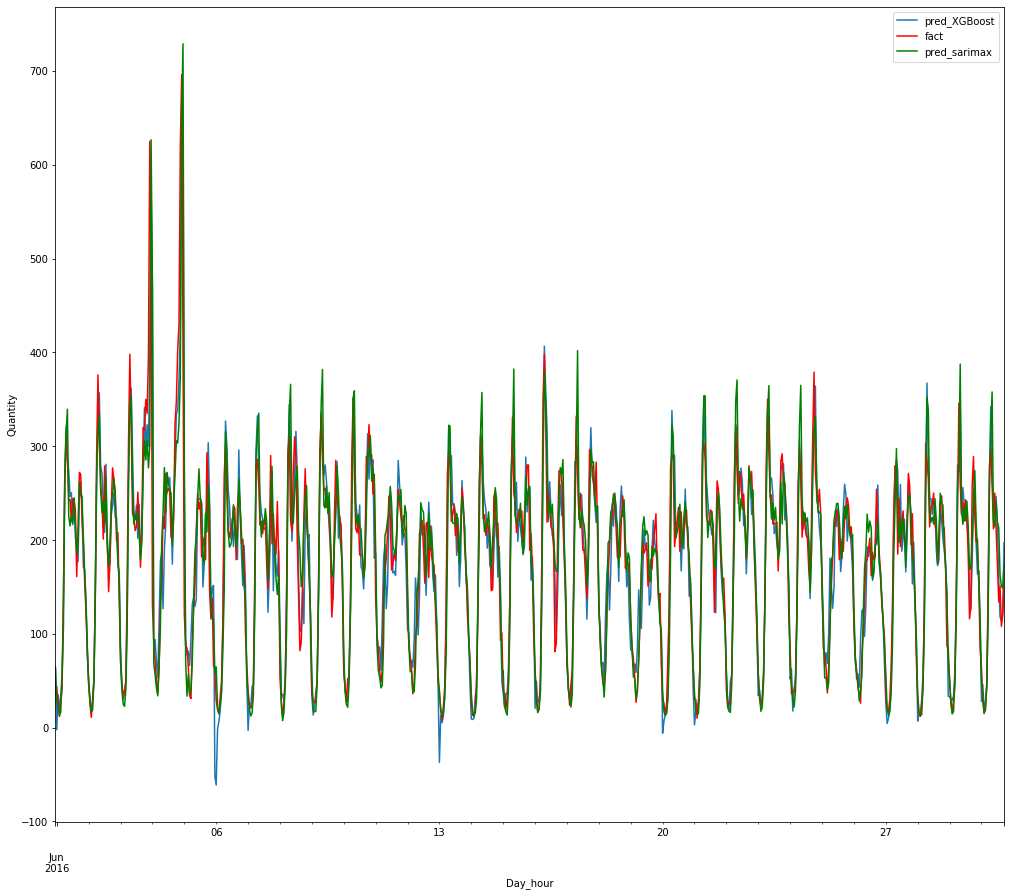

In [142]:
#Построим графики для 1280 зоны за весь июнь.
plt.figure(figsize(17,15))
dyn_1280['pred_XGBoost'].plot(legend=True)
dyn_1280['fact'].plot(legend=True, color='r')
dyn_1280['pred_sarimax'].plot(legend=True, color='g')
plt.xlabel('Day_hour')
plt.ylabel('Quantity')
pylab.show()

<Figure size 1224x936 with 0 Axes>

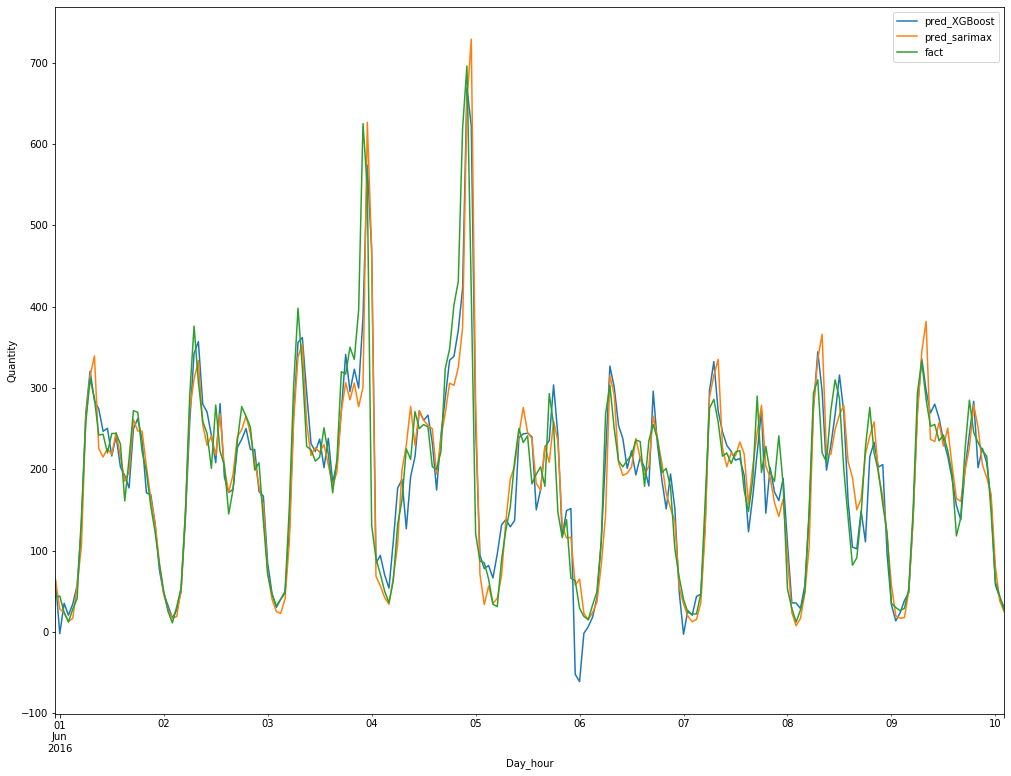

In [143]:
#Построим графики для 1280 зоны на первые 10 дней.
plt.figure(figsize(17,13))
dyn_1280.iloc[:220].plot(y=['pred_XGBoost', 'pred_sarimax', 'fact'])
plt.xlabel('Day_hour')
plt.ylabel('Quantity')
pylab.show()

Предсказания регрессионной модели выгляд точнее. Нужно будет приравнять нулю отрицательные прогнозы, это еще улучшит точность.

In [144]:
list_of_best_params

[{'reg_alpha': 0.5, 'reg_lambda': 0.005},
 {'reg_alpha': 1, 'reg_lambda': 0.005},
 {'reg_alpha': 1, 'reg_lambda': 0.01},
 {'reg_alpha': 0.5, 'reg_lambda': 0.005},
 {'reg_alpha': 0.5, 'reg_lambda': 0.005},
 {'reg_alpha': 0.5, 'reg_lambda': 0.005}]

In [145]:
list_of_best_score

[-18.88,
 -24.444979399987368,
 -26.836971323969774,
 -28.083435992775286,
 -28.467545056370017,
 -27.541472660418464]

In [146]:
#В таблице для июня сделаю колнку сумм разностей предсказания и целевого признака
data_june['s']=abs(data_june['1']-data_june['y_1'])+abs(data_june['2']-data_june['y_2'])+abs(data_june['3']-data_june['y_3'])+abs(data_june['4']-data_june['y_4'])+abs(data_june['5']-data_june['y_5'])+abs(data_june['6']-data_june['y_6'])

In [147]:
data_june.head(2)

,y,d_h,zone,y_1,y_2,y_3,y_4,y_5,y_6,1,2,3,4,5,6,s
0,34.0,2016-05-31 23:00:00,1075,26.0,14.0,5.0,2.0,1.0,7.0,22.931368,17.541929,5.946283,4.457378,4.282107,9.539703,15.836033
1,26.0,2016-06-01 00:00:00,1075,14.0,5.0,2.0,1.0,7.0,23.0,14.229513,8.862007,3.095909,6.066503,10.912876,35.671749,26.838558


In [154]:
#Считаю сумму ошибок по регионам
s_june=0
for region in regions['region']:
    s_june=s_june+sum(data_june['s'][data_june['zone']==int(region)])

In [155]:
#Считаю общую ошибку для июня.
Q_june=s_june/data_june.shape[0]/6

In [156]:
print (Q_june) #Даже очень не плохо.

22.522790300265694


In [151]:
data_may.loc[data_may['y_1'].idxmax()]

y                      2145
d_h     2016-05-03 19:00:00
zone                   1282
y_1                    2206
y_2                    2010
y_3                    1696
y_4                     971
y_5                     546
y_6                     259
1                   2183.61
2                   2068.84
3                   1743.29
4                   1155.63
5                   896.283
6                   564.798
s                    969.22
Name: 33323, dtype: object

In [157]:
sum(data_may['y'][data_may['zone']==1282])

630934.0